In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

In [3]:
# Display the first few rows of the dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Display data summary statistics
print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
# Check for missing values
print(iris_data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Data Normalization and Scaling
# Separate features and target
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Z-Score Normalization (Standardization)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [9]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

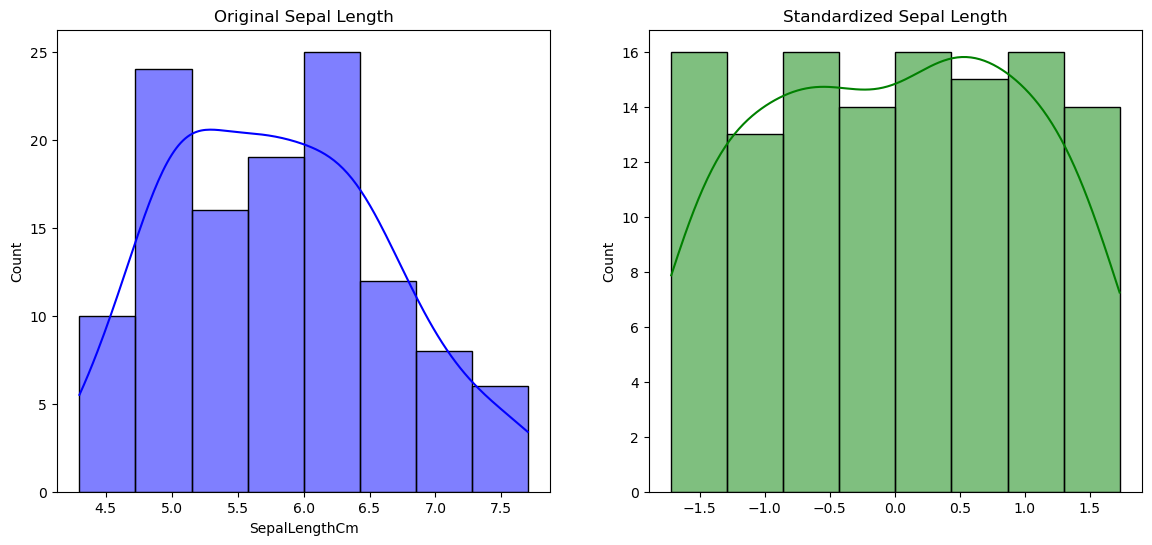

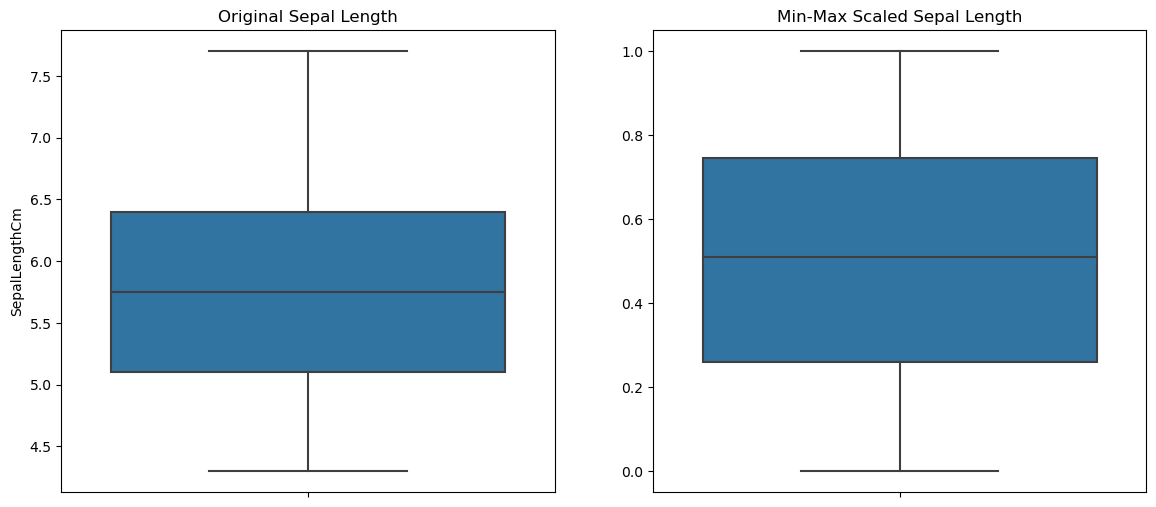

In [10]:
# Visualization of Data Before and After Scaling
# Visualization using histograms for SepalLengthCm before and after standardization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(X_train['SepalLengthCm'], kde=True, color='blue')
plt.title('Original Sepal Length')

plt.subplot(1, 2, 2)
sns.histplot(X_train_standardized[:, 0], kde=True, color='green')  # Index 0 for SepalLengthCm
plt.title('Standardized Sepal Length')
plt.show()

# Box plots for SepalLengthCm before and after Min-Max Scaling
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=X_train['SepalLengthCm'])
plt.title('Original Sepal Length')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train_min_max[:, 0])  # Index 0 for SepalLengthCm
plt.title('Min-Max Scaled Sepal Length')
plt.show()

In [11]:
# Model Performance Evaluation
# Train a simple KNN classifier on original, standardized, and min-max scaled data
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
# Train on original data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred, average='macro')
recall_original = recall_score(y_test, y_pred, average='macro')

In [13]:
# Train on standardized data
knn.fit(X_train_standardized, y_train)
y_pred_standardized = knn.predict(X_test_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
precision_standardized = precision_score(y_test, y_pred_standardized, average='macro')
recall_standardized = recall_score(y_test, y_pred_standardized, average='macro')

In [14]:
# Train on min-max scaled data
knn.fit(X_train_min_max, y_train)
y_pred_min_max = knn.predict(X_test_min_max)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
precision_min_max = precision_score(y_test, y_pred_min_max, average='macro')
recall_min_max = recall_score(y_test, y_pred_min_max, average='macro')

In [15]:
# Display model performance metrics
print("Model Performance Metrics:")
print(f"Original Data - Accuracy: {accuracy_original}, Precision: {precision_original}, Recall: {recall_original}")
print(f"Standardized Data - Accuracy: {accuracy_standardized}, Precision: {precision_standardized}, Recall: {recall_standardized}")
print(f"Min-Max Scaled Data - Accuracy: {accuracy_min_max}, Precision: {precision_min_max}, Recall: {recall_min_max}")

Model Performance Metrics:
Original Data - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Standardized Data - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Min-Max Scaled Data - Accuracy: 1.0, Precision: 1.0, Recall: 1.0


Summary Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Missing Values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Distribution Analysis:


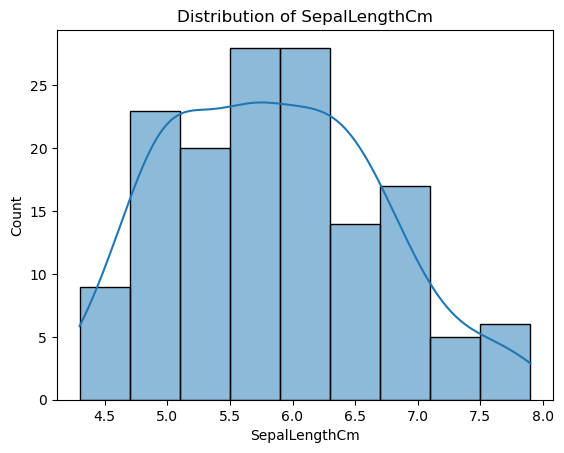

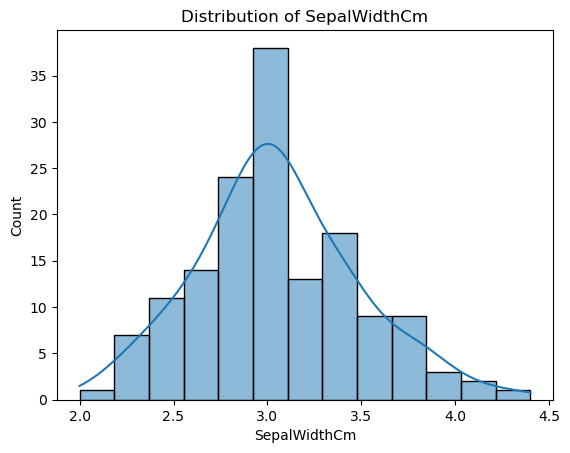

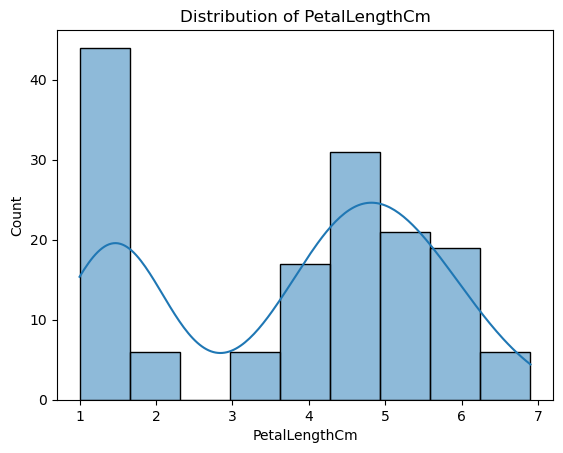

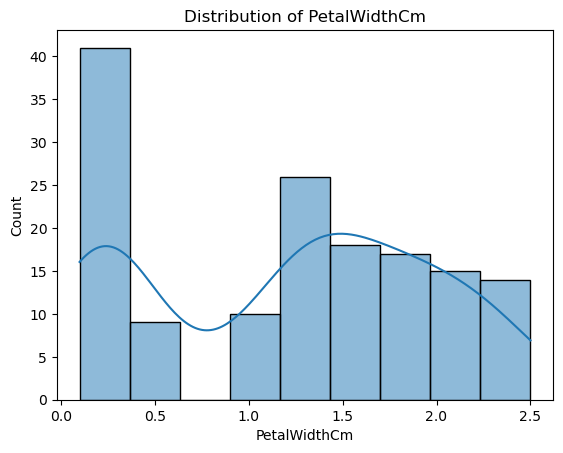


Feature Relationships:


/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


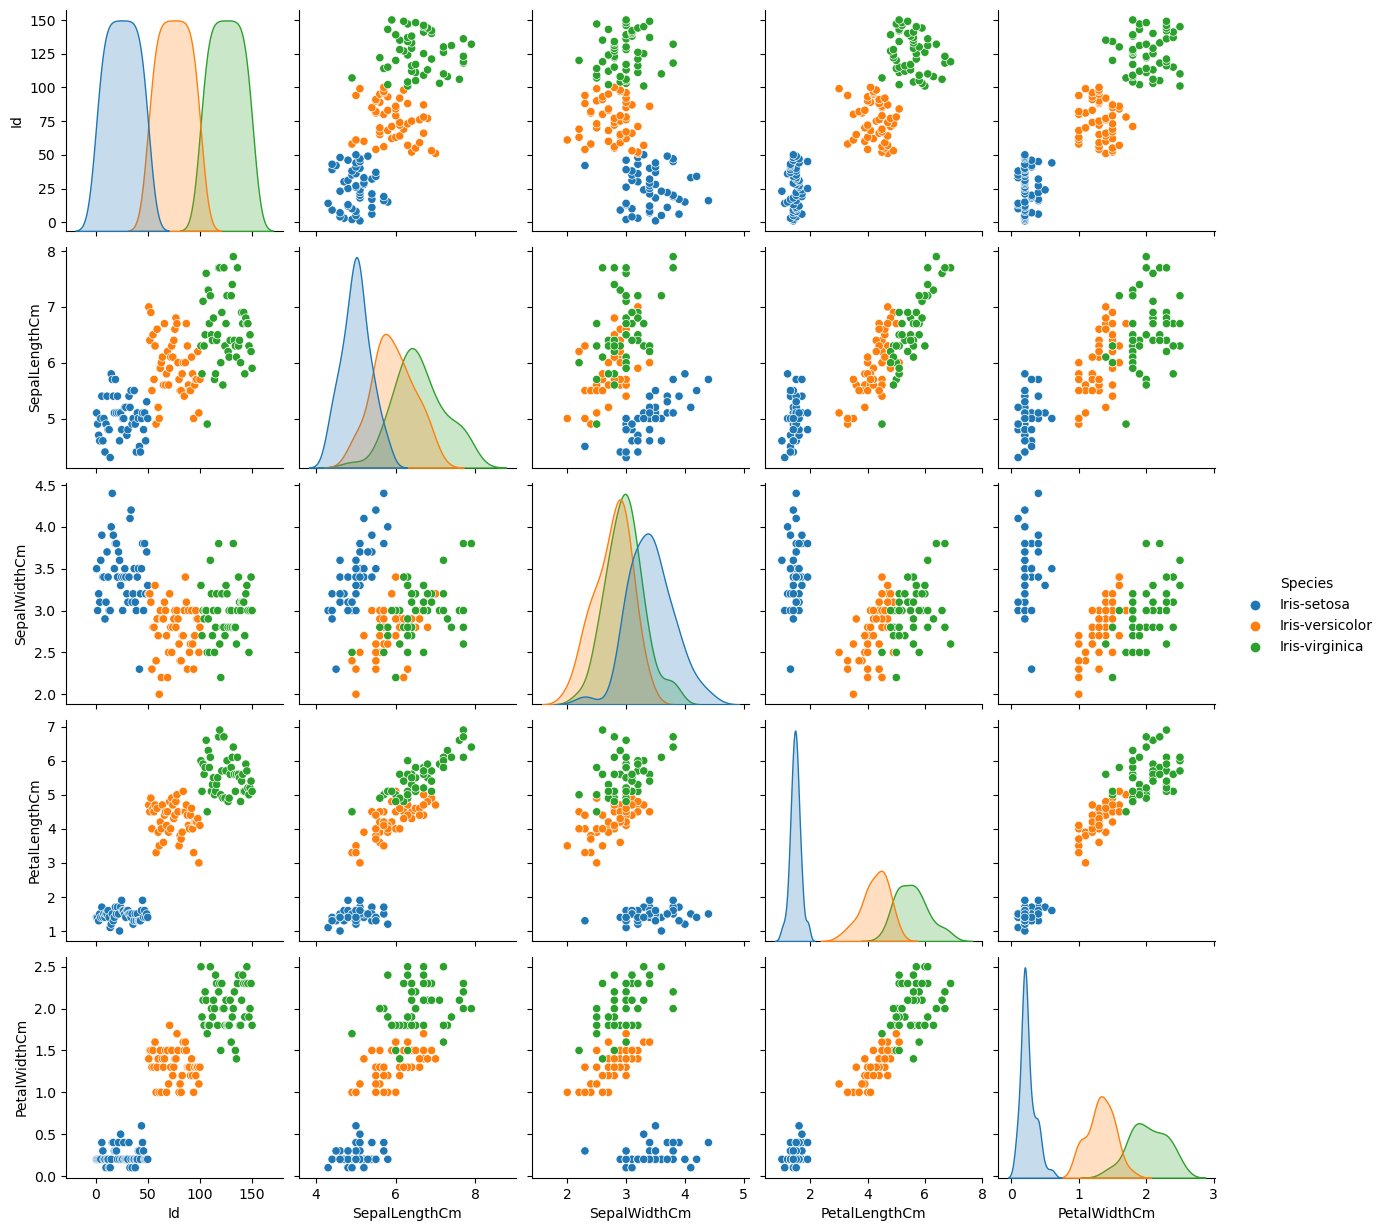


Correlation Matrix:


ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 800x600 with 0 Axes>

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Summary Statistics
print("Summary Statistics:")
print(iris_data.describe())

# Checking for missing values
print("\nMissing Values in each column:")
print(iris_data.isnull().sum())

# Distribution Analysis
print("\nDistribution Analysis:")
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.histplot(iris_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Feature Relationships - Pairplot
print("\nFeature Relationships:")
sns.pairplot(iris_data, hue='Species')
plt.show()

# Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the dataset into training and testing sets
X = iris_data[features]
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Normalization and Scaling
# Z-Score Normalization (Standardization)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

# Model Performance Evaluation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

knn.fit(X_train_standardized, y_train)
y_pred_standardized = knn.predict(X_test_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

knn.fit(X_train_min_max, y_train)
y_pred_min_max = knn.predict(X_test_min_max)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)

# Display model performance metrics
print("Model Performance Metrics:")
print(f"Original Data - Accuracy: {accuracy_original}")
print(f"Standardized Data - Accuracy: {accuracy_standardized}")
print(f"Min-Max Scaled Data - Accuracy: {accuracy_min_max}")

# Analyze the impact of normalization and scaling on feature relationships
def plot_feature_relationships(data, title):
    sns.pairplot(data, hue='Species')
    plt.title(title)
    plt.show()

# Convert scaled data back to DataFrame for visualization
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=features)
X_train_min_max_df = pd.DataFrame(X_train_min_max, columns=features)

# Analyze the impact
print("\nImpact of Standardization on Feature Relationships:")
plot_feature_relationships(pd.concat([X_train_standardized_df, y_train.reset_index(drop=True)], axis=1), "Standardized Data")

print("\nImpact of Min-Max Scaling on Feature Relationships:")
plot_feature_relationships(pd.concat([X_train_min_max_df, y_train.reset_index(drop=True)], axis=1), "Min-Max Scaled Data")